<a href="https://colab.research.google.com/github/7h310v3/PTDL/blob/master/pandas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh
(sử dụng Google Colab)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
import seaborn as sns
import scipy.stats as st

Câu 2: Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.

In [ ]:
#Liên kết google drive và google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Đọc dữ liệu
df = pd.read_csv("/content/gdrive/MyDrive/PTDL/database.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

Xác định các cột định lượng.

In [ ]:
df_dl = pd.DataFrame(columns = ["Fatalities", "Injuries", "Aircraft Damage", "Radome Damage", "Windshield Damage", "Nose Damage", "Engine1 Damage", "Engine2 Damage", "Engine3 Damage", "Engine4 Damage", "Propeller Damage", "Wing or Rotor Damage", "Fuselage Damage", "Landing Gear Damage", "Tail Damage", "Lights Damage", "Other Damage"], data = df)

In [ ]:
df_dl

,Fatalities,Injuries,Aircraft Damage,Radome Damage,Windshield Damage,Nose Damage,Engine1 Damage,Engine2 Damage,Engine3 Damage,Engine4 Damage,Propeller Damage,Wing or Rotor Damage,Fuselage Damage,Landing Gear Damage,Tail Damage,Lights Damage,Other Damage
0,NaN,NaN,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174100,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,NaN,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
174102,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Áp dụng các phép tính hướng tâm, phép tính phương sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các cột dữ liệu định lượng.

In [ ]:
df_dl.describe()

,Fatalities,Injuries,Aircraft Damage,Radome Damage,Windshield Damage,Nose Damage,Engine1 Damage,Engine2 Damage,Engine3 Damage,Engine4 Damage,Propeller Damage,Wing or Rotor Damage,Fuselage Damage,Landing Gear Damage,Tail Damage,Lights Damage,Other Damage
count,565.000000,229.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,0.046018,1.746725,0.085977,0.009150,0.005956,0.006577,0.014445,0.011619,0.000971,0.000425,0.003326,0.024009,0.004733,0.005813,0.004176,0.004216,0.008989
std,0.435164,6.571239,0.280331,0.095216,0.076947,0.080829,0.119318,0.107166,0.031141,0.020612,0.057572,0.153076,0.068633,0.076019,0.064485,0.064793,0.094383
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hiện các
ngoại lệ không?nếu có thì ở cột nào?

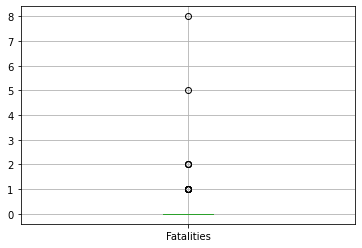

In [ ]:
#Vẽ biểu đồ boxplot cho engines.
df_dl.boxplot(['Fatalities']);

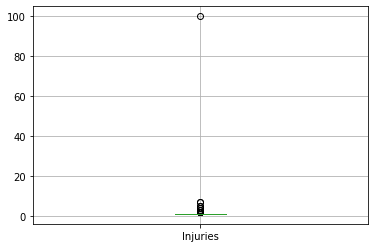

In [ ]:
#Vẽ biểu đồ boxplot cho Injuries.
df_dl.boxplot(["Injuries"])

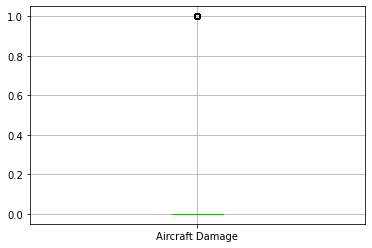

In [ ]:
#Vẽ biểu đồ boxplot cho Aircraft Damage.
df_dl.boxplot(["Aircraft Damage"])

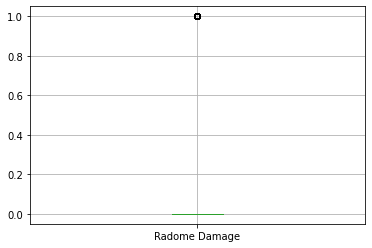

In [ ]:
#Vẽ biểu đồ boxplot cho Radome Damage.
df_dl.boxplot(["Radome Damage"])

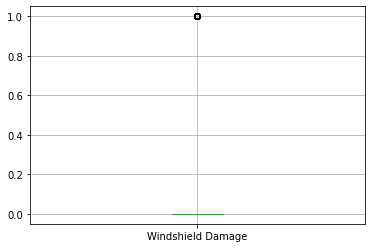

In [ ]:
#Vẽ biểu đồ boxplot cho Windshield Damage.
df_dl.boxplot(["Windshield Damage"])

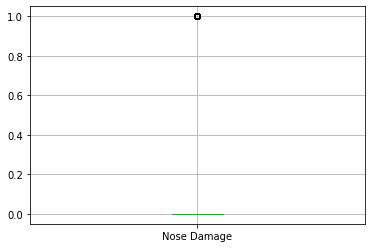

In [ ]:
#Vẽ biểu đồ boxplot cho Nose Damage.
df_dl.boxplot(["Nose Damage"])

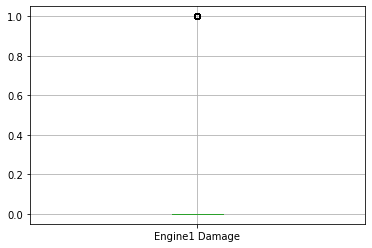

In [ ]:
#Vẽ biểu đồ boxplot cho Engine1 Damage.
df_dl.boxplot(["Engine1 Damage"])

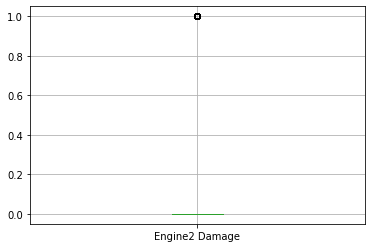

In [ ]:
#Vẽ biểu đồ boxplot cho Engine2 Damage.
df_dl.boxplot(["Engine2 Damage"])

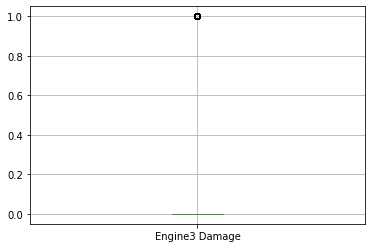

In [ ]:
#Vẽ biểu đồ boxplot cho Engine3 Damage.
df_dl.boxplot(["Engine3 Damage"])

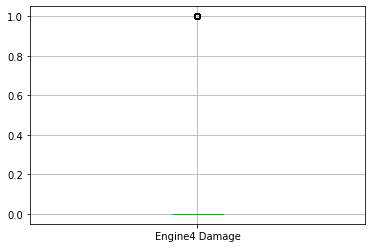

In [ ]:
#Vẽ biểu đồ boxplot cho Engine4 Damage.
df_dl.boxplot(["Engine4 Damage"])

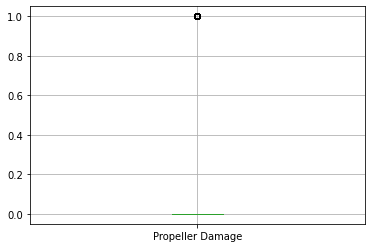

In [ ]:
#Vẽ biểu đồ boxplot cho Propeller Damage.
df_dl.boxplot(["Propeller Damage"])

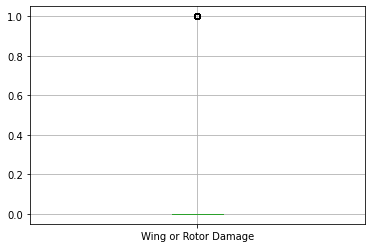

In [ ]:
  #Vẽ biểu đồ boxplot cho Wing or Rotor Damage.
  df_dl.boxplot(["Wing or Rotor Damage"])

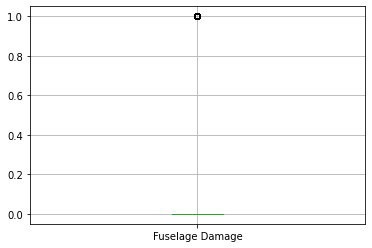

In [ ]:
#Vẽ biểu đồ boxplot cho Fuselage Damage.
df_dl.boxplot(["Fuselage Damage"])

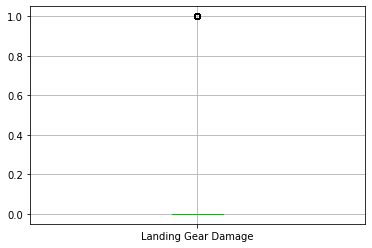

In [ ]:
#Vẽ biểu đồ boxplot cho Landing Gear Damage.
df_dl.boxplot(["Landing Gear Damage"])

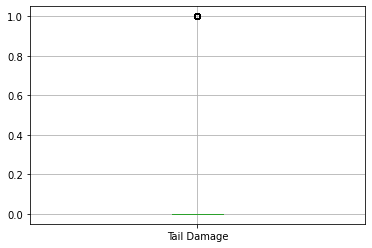

In [ ]:
#Vẽ biểu đồ boxplot cho Tail Damage.
df_dl.boxplot(["Tail Damage"])

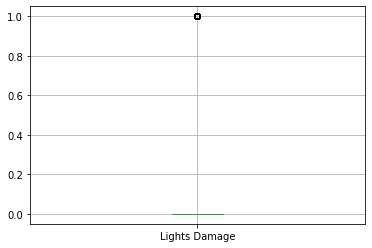

In [ ]:
#Vẽ biểu đồ boxplot cho Lights Damage.
df_dl.boxplot(["Lights Damage"])

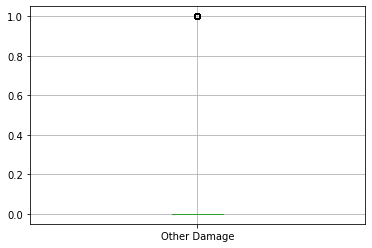

In [ ]:
#Vẽ biểu đồ boxplot cho Other Damage.
df_dl.boxplot(["Other Damage"])

Kết luận rằng : Cột dữ liệu Fatalities, Injuries có xuất hiện các giá trị ngoại lệ.

Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

Gợi ý: sử dụng chỉ số z hoặc hàm tính phân vị (quantile)

In [ ]:
for i in ["Fatalities", "Injuries"]:
  mean = df[i].mean()
  df[i] = df[i].fillna(mean)

In [ ]:
df_z=  df[["Fatalities", "Injuries"]]
z_scores = np.abs(st.zscore(df_z))
df_z = df_z[(z_scores < 3).all(axis=1)]

Câu 6: Thực hiện lại câu 3 – 4 với tập dữ liệu sau khi đã loại bỏ ngoại lệ.

In [ ]:
df_z.describe()

,Fatalities,Injuries
count,173906.000000,173906.000000
mean,0.045871,1.746786
std,0.002591,0.003936
min,0.000000,1.746725
25%,0.046018,1.746725
50%,0.046018,1.746725
75%,0.046018,1.746725
max,0.046018,2.000000


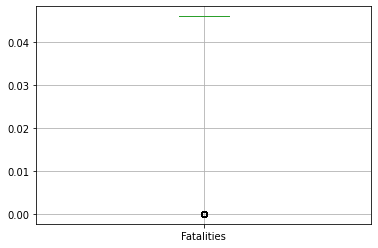

In [ ]:
#Vẽ biểu đồ boxplot cho Fatalities.
df_z.boxplot(['Fatalities'])

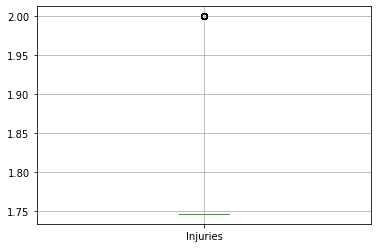

In [ ]:
#Vẽ biểu đồ boxplot cho Injuries.
df_z.boxplot(['Injuries'])

Câu 7: Hãy tính độ tương quan (correlation) giữa các cột định lượng. (Hay xây dựng correlation
matrix)

In [ ]:
correlation = df_z.corr(method="pearson")
correlation

,Fatalities,Injuries
Fatalities,1.000000,0.000878
Injuries,0.000878,1.000000


Câu 8: Từ correlation matrix, Hãy vẽ:
- Heat map (biểu đồ nhiệt)
- Pair plot (biểu đồ cặp)

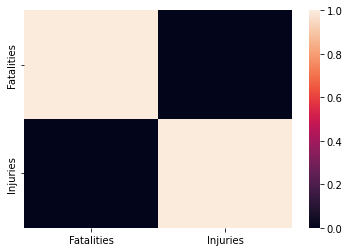

In [ ]:
#Biểu đồ nhiệt.
ax = sns.heatmap(correlation,vmin = 0,vmax=1)

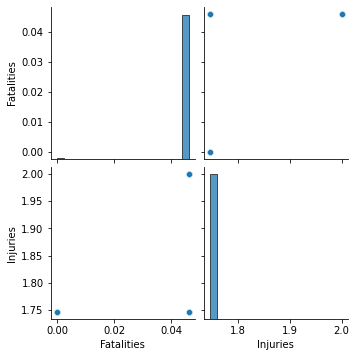

In [ ]:
#Pair plot (biểu đồ cặp)
sns.pairplot(df_z);

Câu 9: Đối với các cột dữ liệu định tính, hãy:
- Vẽ biểu đồ cột dạng đứng
- Vẽ biểu đồ cột dạng ngang
- Vẽ biểu đồ đường tròn
- Vẽ biểu đồ Pareto

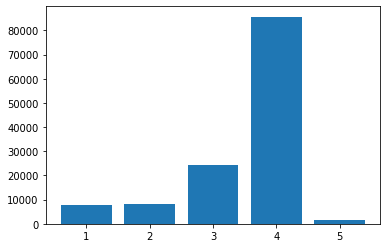

In [ ]:
#Biểu đồ đứng
x = dict(df["Aircraft Mass"].value_counts()).keys()
y = dict(df["Aircraft Mass"].value_counts()).values()
plt.bar(x,y);